# DNN Model

In [257]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [258]:
# data loading from .npz generated from tcr_data_process.ipynb
# loading train data
npz = np.load('data_train.npz')
train_inputs = npz['input'].astype(np.float64)
train_targets = npz['targets'].astype(np.float64)
# loading validation data
npz = np.load('data_validation.npz')
validation_inputs, validation_targets = npz['input'].astype(np.float64), npz['targets'].astype(np.float64)

npz = np.load('data_test.npz')
test_inputs, test_targets = npz['input'].astype(np.float64), npz['targets'].astype(np.float64)

# ANN Model

Outline, Optimizer, Loss function, Early stopping and Training rate

In [259]:
# NN model prep
input_size = 2
output_size = 1
hidden_layer_1_size = 6
hidden_layer_2_size = 6
hidden_layer_3_size = 6

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(hidden_layer_2_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_3_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_3_size, activation='sigmoid'),
    tf.keras.layers.Dense(output_size, activation='linear')
])


In [260]:
# model prep, optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer, loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [261]:
# Training
BATCH_SIZE = 1
MAX_EPOCHS = 1000
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [262]:
# fit the model
history = model.fit(
    train_inputs, train_targets, batch_size=BATCH_SIZE,epochs=MAX_EPOCHS, callbacks=[early_stopping], validation_data=(validation_inputs, validation_targets), verbose=2
          )

Epoch 1/1000
91/91 - 4s - loss: 416.9242 - root_mean_squared_error: 20.4187 - val_loss: 342.6806 - val_root_mean_squared_error: 18.5116 - 4s/epoch - 44ms/step
Epoch 2/1000
91/91 - 0s - loss: 283.9704 - root_mean_squared_error: 16.8514 - val_loss: 223.7615 - val_root_mean_squared_error: 14.9587 - 445ms/epoch - 5ms/step
Epoch 3/1000
91/91 - 0s - loss: 179.9590 - root_mean_squared_error: 13.4149 - val_loss: 143.2538 - val_root_mean_squared_error: 11.9689 - 326ms/epoch - 4ms/step
Epoch 4/1000
91/91 - 1s - loss: 116.6718 - root_mean_squared_error: 10.8015 - val_loss: 102.7515 - val_root_mean_squared_error: 10.1366 - 655ms/epoch - 7ms/step
Epoch 5/1000
91/91 - 1s - loss: 80.6545 - root_mean_squared_error: 8.9808 - val_loss: 79.0594 - val_root_mean_squared_error: 8.8915 - 736ms/epoch - 8ms/step
Epoch 6/1000
91/91 - 0s - loss: 58.1278 - root_mean_squared_error: 7.6242 - val_loss: 64.8453 - val_root_mean_squared_error: 8.0527 - 384ms/epoch - 4ms/step
Epoch 7/1000
91/91 - 1s - loss: 44.1852 - ro

In [263]:
# ANN model summary
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (1, 6)                    18        
                                                                 
 dense_65 (Dense)            (1, 1)                    7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


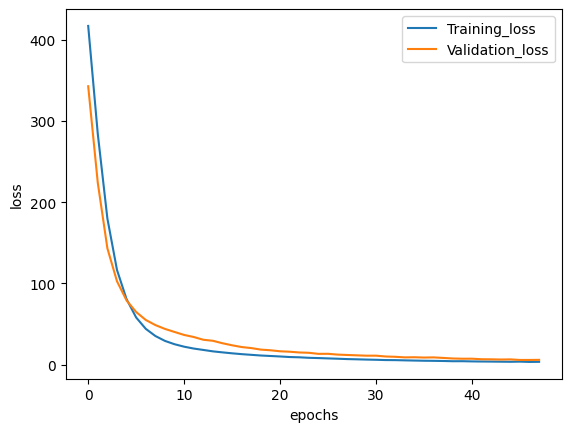

In [264]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Model check on Test data

In [265]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

1/1 [==============================] - 1s 928ms/step - loss: 3.5474 - root_mean_squared_error: 1.8835


In [266]:
print('\nTest loss: {0:.4f}. Test accuracy: {1:.4f} rmse'.format(test_loss, test_accuracy))


Test loss: 3.5474. Test accuracy: 1.8835 rmse


In [267]:
prediction = model.predict(test_inputs)
data_inputs = pd.DataFrame(test_inputs)
prediction = pd.DataFrame(np.round(prediction,4))
test_targets = pd.DataFrame(test_targets)
pred_accu = np.round((prediction/test_targets)*100,2)

result = pd.concat([test_targets, prediction, pred_accu], axis = 1, ignore_index=True)
result.columns = ['Target-St(%)', 'Prediction-St(%)','Pred-Accu-St(%)']
result

1/1 [==============================] - 0s 254ms/step


,Target-St(%),Prediction-St(%),Pred-Accu-St(%)
0,2.33,4.673400,200.58
1,32.70,30.244499,92.49
2,19.66,19.904100,101.24
3,14.67,14.655700,99.90
4,18.23,17.778999,97.53
5,31.82,31.308399,98.39
6,18.49,17.201900,93.03
7,20.76,19.276899,92.86
8,16.53,15.066300,91.15
9,14.69,13.161800,89.60


Text(0.5, 0, 'Targets (red) & Predictions (blue)')

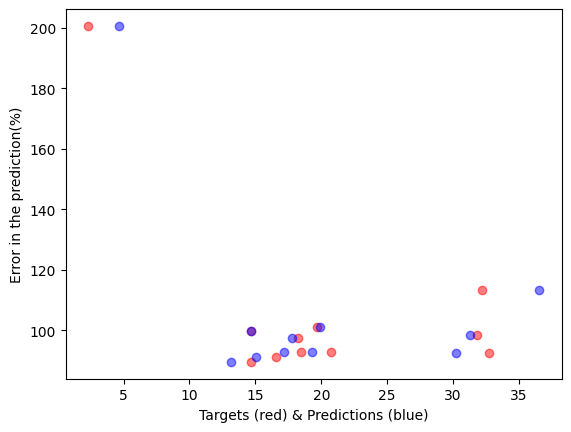

In [268]:
import matplotlib.pyplot as plt
plt.scatter(result['Target-St(%)'], result['Pred-Accu-St(%)'], alpha=0.5, color='r')
plt.scatter(result['Prediction-St(%)'], result['Pred-Accu-St(%)'],alpha=0.5, color='b')
plt.ylabel('Error in the prediction(%)')
plt.xlabel('Targets (red) & Predictions (blue)')

Text(0.5, 0, 'Targets')

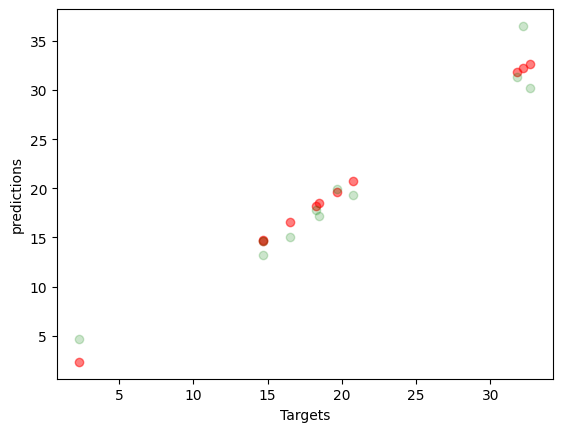

In [269]:
plt.scatter(result['Target-St(%)'], result['Target-St(%)'], alpha=0.5, color='r')
plt.scatter(result['Target-St(%)'], result['Prediction-St(%)'], alpha=0.2, color='g')

plt.ylabel('predictions')
plt.xlabel('Targets')

In [270]:
# estimation of R2 score
from sklearn.metrics import r2_score
r2_score_test = r2_score(test_targets, prediction)
np.round(r2_score_test,4)

0.9534

In [271]:
# estimation of adjusted R2 score
n = np.size(test_targets)
k = 3 # number of features
adj_r2_score = 1 - (((1-r2_score_test)*(n-1))/((n-k-1)))
np.round(adj_r2_score,4)

0.9334

In [272]:
mean_pred = pred_accu.mean()
std_pred = pred_accu.std()
uncertainty_model = std_pred
print("Uncertainty of the ANN model:", np.round(uncertainty_model[0],2), '[%]')
print("Average test prediction precision", np.round(100 - uncertainty_model[0],2), '[%]')

Uncertainty of the ANN model: 31.94 [%]
Average test prediction precision 68.06 [%]


# ANN Model Deployment

ANN model deployment for micro DSC error prediction

In [273]:
import keras
model.save('ec_pred_ann.h5')